# Random numbers & Probability

In [39]:
# import libraries
         
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import binom
from scipy.stats import uniform

In [40]:
# import dataset
amir_deals = pd.read_csv('amir_deals.csv', index_col=0)

In [41]:
# info
amir_deals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 1 to 178
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   product    178 non-null    object 
 1   client     178 non-null    object 
 2   status     178 non-null    object 
 3   amount     178 non-null    float64
 4   num_users  178 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 8.3+ KB


In [42]:
# head
amir_deals.head()

,product,client,status,amount,num_users
1,Product F,Current,Won,7389.52,19
2,Product C,New,Won,4493.01,43
3,Product B,New,Won,5738.09,87
4,Product I,Current,Won,2591.24,83
5,Product E,Current,Won,6622.97,17


You're in charge of the sales team, and it's time for performance reviews, starting with Amir. As part of the review, you want to randomly select a few of the deals that he's worked on over the past year so that you can look at them more deeply. Before you start selecting deals, you'll first figure out what the chances are of selecting certain deals.

In [43]:
# Count the number of deals Amir worked on for each product type and store in counts.
counts = amir_deals['product'].value_counts()
counts

Product B    62
Product D    40
Product A    23
Product C    15
Product F    11
Product H     8
Product I     7
Product E     5
Product N     3
Product G     2
Product J     2
Name: product, dtype: int64

In [44]:
# Calculate probability of picking a deal with each product
probs = counts / amir_deals.shape[0]
probs

Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: product, dtype: float64

### Sampling deals

In the previous exercise, you counted the deals Amir worked on. Now it's time to randomly pick five deals so that you can reach out to each customer and ask if they were satisfied with the service they received. You'll try doing this both with and without replacement.

Additionally, you want to make sure this is done randomly and that it can be reproduced in case you get asked how you chose the deals, so you'll need to set the random seed before sampling from the deals.

In [45]:
# Set random seed
np.random.seed(24)

# Sample 5 deals without replacement
sample_without_replacement = amir_deals.sample(5, replace=False)
print(sample_without_replacement)

print()

# Sample 5 deals with replacement
sample_with_replacement = amir_deals.sample(5, replace=True)
print(sample_with_replacement)

       product   client status   amount  num_users
128  Product B  Current    Won  2070.25          7
149  Product D  Current    Won  3485.48         52
78   Product B  Current    Won  6252.30         27
105  Product D  Current    Won  4110.98         39
167  Product C      New   Lost  3779.86         11

       product   client status   amount  num_users
134  Product D  Current    Won  5992.86         98
102  Product H  Current    Won  5116.34         63
111  Product B  Current    Won   696.88         44
50   Product B  Current    Won  3488.36         79
57   Product D  Current    Won  6820.84         42


## Discrete Distrubutions

In [46]:
# create dataframe
restaurant_groups = pd.DataFrame(
    {'group_id': ['A','B','C','D','E','F','G','H','I','J'],
    'group_size': [2,4,6,2,2,2,3,2,4,2]}
)

restaurant_groups

,group_id,group_size
0,A,2
1,B,4
2,C,6
3,D,2
4,E,2
5,F,2
6,G,3
7,H,2
8,I,4
9,J,2


A new restaurant opened a few months ago, and the restaurant's management wants to optimize its seating space based on the size of the groups that come most often. On one night, there are 10 groups of people waiting to be seated at the restaurant, but instead of being called in the order they arrived, they will be called randomly. In this exercise, you'll investigate the probability of groups of different sizes getting picked first. Data on each of the ten groups is contained in the restaurant_groups DataFrame.

The expected value can be calculated by multiplying each possible outcome with its corresponding probability and taking the sum. 

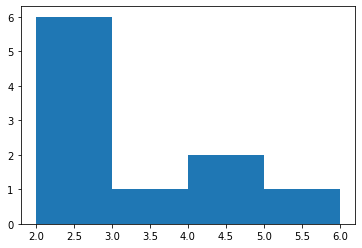

In [47]:
# Create a histogram of the group_size column of restaurant_groups, setting bins to [2, 3, 4, 5, 6].

plt.hist(restaurant_groups.group_size, bins = [2,3,4,5,6]);
plt.show()

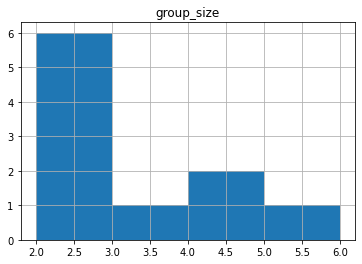

In [48]:
restaurant_groups.hist(bins=[2,3,4,5,6])
plt.show()

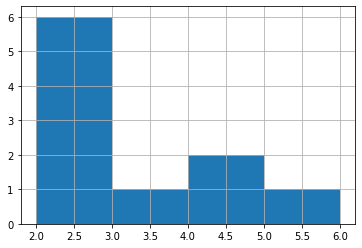

In [49]:
restaurant_groups['group_size'].hist(bins=[2,3,4,5,6])
plt.show()

In [50]:
# Create probability distribution
size_dist = restaurant_groups['group_size'].value_counts() / restaurant_groups.shape[0]
size_dist

2    0.6
4    0.2
6    0.1
3    0.1
Name: group_size, dtype: float64

In [51]:
# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']

size_dist

,group_size,prob
0,2,0.6
1,4,0.2
2,6,0.1
3,3,0.1


In [52]:
# Calculate the expected value of the size_distribution, which represents the expected group size, 
# by multiplying the group_size by the prob and taking the sum.


# Expected value
expected_value = np.sum(size_dist['group_size'] * size_dist['prob'])
expected_value

2.9000000000000004

In [53]:
# Calculate the probability of randomly picking a group of 4 or more people by subsetting for groups of size 4 or more 
# and summing the probabilities of selecting those groups.

# Subset groups of size 4 or more
groups_4_or_more = size_dist[size_dist['group_size'] >= 4]
groups_4_or_more

,group_size,prob
1,4,0.2
2,6,0.1


In [54]:
# Sum the probabilities of groups_4_or_more
prob_4_or_more = np.sum(groups_4_or_more['prob'])
prob_4_or_more

0.30000000000000004

## Continuous Distribution

The city bus arrives once every twelve minutes, so if you show up at a random time, you could wait anywhere from 0 minutes if you just arrive as the bus pulls in, up to 12 minutes if you arrive just as the bus leaves.

Continuous uniform distribution

Let's model this scenario with a probability distribution. There are an infinite number of minutes we could wait since we could wait 1 minute, 1.5 minutes, 1.53 minutes, and so on, so we can't create individual blocks like we could with a discrete variable.

In [55]:
# What is the probability we will wait 7 minutes or less to catch the bus?
# pass in 7 followed by lower and upper limits.

uniform.cdf(7,0,12)

0.5833333333333334

In [56]:
# what is the probability of waiting more than 7 minutes?
1 - uniform.cdf(7, 0,12)

0.41666666666666663

In [57]:
# what is the probability of waiting 4 to 7 minutes?
uniform.cdf(7, 0, 12) - uniform.cdf(4, 0, 12)

0.25000000000000006

Generating random numbers according to uniform distribution

In [58]:
# pass in the minimum value, maximum value and the number of random values to generate
uniform.rvs(0, 5, size=10)

array([2.92288768, 4.52194128, 0.09696506, 2.59715235, 1.31207975,
       3.29012423, 3.25847287, 2.58296779, 1.68487324, 3.07366717])

DISTRIBUTIONS

1. Discrete uniform distribution,

2. Continuous uniform distribution,

3. Normal distribution,

3. Exponential distributions.

The sales software used at your company is set to automatically back itself up, but no one knows exactly what time the back-ups happen. It is known, however, that back-ups happen exactly every 30 minutes. Amir comes back from sales meetings at random times to update the data on the client he just met with. He wants to know how long he'll have to wait for his newly-entered data to get backed up. Use your new knowledge of continuous uniform distributions to model this situation and answer Amir's questions.

In [59]:
# To model how long Amir will wait for a back-up using a continuous uniform distribution, save his lowest possible wait time as min_time
#  and his longest possible wait time as max_time. Remember that back-ups happen every 30 minutes.

# Min and max wait times for back-up that happens every 30 min
min_time = 0
max_time = 30

In [60]:
# Calculate probability of waiting less than 5 mins
prob_less_than_5 = uniform.cdf(5, 0, 30)
print(prob_less_than_5)

0.16666666666666666


In [61]:
# Calculate probability of waiting more than 5 mins
prob_greater_than_5 = 1 - uniform.cdf(5, 0, 30)
print(prob_greater_than_5)

0.8333333333333334


In [62]:
# Calculate probability of waiting 10-20 mins
prob_between_10_and_20 = uniform.cdf(20, 0, 30) - uniform.cdf(10, 0,30)
print(prob_between_10_and_20)

0.3333333333333333


### Simulating wait times

To give Amir a better idea of how long he'll have to wait, you'll simulate Amir waiting 1000 times and create a histogram to show him what he should expect. Recall from the last exercise that his minimum wait time is 0 minutes and his maximum wait time is 30 minutes.

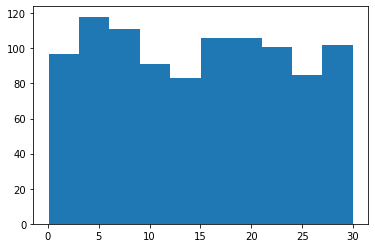

In [63]:
# set random seed to 334
np.random.seed(334)

# Generate 1000 wait times between 0 and 30 mins
wait_times = uniform.rvs(0, 30, size=1000)

# Create a histogram of simulated times and show plot
plt.hist(wait_times)
plt.show()

Unless Amir figures out exactly what time each backup happens, he won't be able to time his data entry so it gets backed up sooner, but it looks like he'll wait about 15 minutes on average.

## The Binomial Distribution

The binomial distribution describes the probability of the number of successes in a sequence of independent trials. In other words, it can tell us the probability of getting some number of heads in a sequence of coin flips. Note that this is a discrete distribution since we're working with a countable outcome.

The binomial distribution can be described using two parameters, n and p.

n represents the total number of trials being performed,

and p is the probability of success. 

n and p are also the third and second arguments of binom.rvs. 

flipping a coin

binom.rvs(# of coins we want to flip, probability of heads/success, size=# of trials)

size is a named argument so we need to explicitly specify that the 3rd argument is size.

### One flip once

In [64]:
# flip 1 coin with 50% probability of heads 1 time
binom.rvs(1, 0.5, size=1)

array([1])

### One flip many times

In [65]:
# flip 1 coin with 50% chance of a head 8 times
binom.rvs(1, 0.5, size=8)

array([1, 0, 0, 1, 0, 0, 1, 0])

### Many flips one time

In [66]:
# flip 8 coins once
# we get one number, which is the total number of heads or successes
binom.rvs(8, 0.5, size=1)

array([3])

### Many flips many times

In [67]:
# this returns 10 numbers each representing the total number of heads from each set of flips.
binom.rvs(3, 0.5, size=10)

array([2, 2, 1, 1, 1, 1, 2, 1, 2, 0])

In [68]:
# What is the probability of getting 7 heads from 10 coins. We  can use binom.pmf

# binom.pmf(num heads, num trials, prob of heads)
binom.pmf(7, 10, 0.5)

0.11718749999999999

In [69]:
# What is the probability of getting 7 or fewer heads out of 10 coins
binom.cdf(7, 10, 0.5)

0.9453125

In [70]:
# probability of more than 7 heads
1 - binom.cdf(7, 10, 0.5)

0.0546875

### Expected Value
n * p

In [71]:
# expected number of heads from flipping 10 coins
10*0.5

5.0

### Simulating sales deals

Assume that Amir usually works on 3 deals per week, and overall, he wins 30% of deals he works on. Each deal has a binary outcome: it's either lost, or won, so you can model his sales deals with a binomial distribution. In this exercise, you'll help Amir simulate a year's worth of his deals so he can better understand his performance.

In [72]:
# Set random seed to 10
np.random.seed(10)

# Simulate a single deal
print(binom.rvs(1, 0.3, size=1))

# Simulate 1 week of 3 deals
print(binom.rvs(3, 0.3, size=1))

# Simulate 52 weeks of 3 deals
deals = binom.rvs(3, 0.3, size =52)

# Print mean deals won per week
print(np.mean(deals))

[1]
[0]
0.8461538461538461


### Calculating binomial probabilities

Assume that Amir wins 30% of deals. He wants to get an idea of how likely he is to close a certain number of deals each week. In this exercise, you'll calculate what the chances are of him closing different numbers of deals using the binomial distribution.

In [73]:
# What's the probability that Amir closes all 3 deals in a week? Save this as prob_3.

# Probability of closing 3 out of 3 deals
prob_3 = binom.pmf(3, 3, 0.3)

print(prob_3)

0.026999999999999996


In [74]:
# Probability of closing <= 1 deal out of 3 deals
prob_less_than_or_equal_1 = binom.cdf(1, 3, 0.3)

print(prob_less_than_or_equal_1)

0.784


In [75]:
# What's the probability that Amir closes more than 1 deal? Save this as prob_greater_than_1.
# Probability of closing > 1 deal out of 3 deals
prob_greater_than_1 = 1 - binom.cdf(1, 3, 0.3)

print(prob_greater_than_1)

0.21599999999999997


### How many sales will be won?
Now Amir wants to know how many deals he can expect to close each week if his win rate changes. Luckily, you can use your binomial distribution knowledge to help him calculate the expected value in different situations. The expected value of a binomial distribution can be calculated by _n*p_

In [76]:
# Calculate the expected number of sales out of the 3 he works on that Amir will win each week if he maintains his 30% win rate.
# Expected number won with 30% win rate
won_30pct = 3 * 0.3
print(won_30pct)

# Calculate the expected number of sales out of the 3 he works on that he'll win if his win rate drops to 25%.
# Expected number won with 25% win rate
won_25pct = 3*0.25
print(won_25pct)

# Calculate the expected number of sales out of the 3 he works on that he'll win if his win rate rises to 35%.
# Expected number won with 35% win rate
won_35pct = 3*0.35
print(won_35pct)

0.8999999999999999
0.75
1.0499999999999998


If Amir's win rate goes up by 5%, he can expect to close more than 1 deal on average each week.